# UC San Diego: Modeling and Data Analysis
### Instructor: C. Alex Simpkins Ph.D. / TA: Sagarika Sardesai
## Final Project Title: Accidental drug related deaths in Connecticut

# Names

- Alan Trapenard
- Carlos van der Ley
- Noah Vaks 

# Presentation

Video link: https://www.youtube.com/watch?v=vbhOy5R5L0A


Presentation Slides: https://docs.google.com/presentation/d/1xxcXl6fAbCRmLg0c3lQWiu1vynJVKKAQ0I8JQwJ3QWM/edit?usp=sharing

# Overview

Drug overdose deaths have been a significant public health concern, driven primarily by the misuse and abuse of opioids, including prescription painkillers and illicit opioids like heroin and synthetic opioids such as fentanyl.

Connecticut witnessed a steady rise in drug overdose deaths. Fentanyl, a potent synthetic opioid, has been a major contributor to the increase in fatalities due to its high potency and involvement in many overdose cases. Other factors that have contributed to the crisis include the widespread availability of opioids, inappropriate prescribing practices by healthcare providers, and challenges in accessing addiction treatment and support services.

<a id='research_question'></a>
# Research Question

What is the most common drug associated with fatal overdose in Connecticut? How does the substance used for overdose vary across age ranges?

<a id='background'></a>

## Background & Prior Work


Fatal drug overdoses  in the United States have been increasing steadily on a yearly basis. Nearly 100,000 people in the US died from overdoses in 2021[^hedegaard2021]. Substance abuse is classified as a mental health disorder by the American Psychiatric Association in the DSM V[^mcneely2020]. The pathways to addiction are complex and can be traced to factors such as significant childhood trauma, family histories with addiction, social and economic inequality[hirsch2017], and an overprescription of pharmaceutical drugs[^makary2017]. Overdoses occur with a variety of drugs, but the most prevalent drug class involved in ODs is opioids at . Opioids currently account for approximately 72% of overdoses.

Drug addiction is a highly politicized topic, and public policy is often divided on whether to treat substance abuse as a health issue, a moral issue, or a crime issue. Studies such as Altekruse et al. (2020) and Martins et al (2015) adopt a data-driven, science based approach to addiction. Providing more data to support the most effective route to addressing overdose related fatality is an effective way to destigmatize drug addiction. There is a wealth of studies available on the topic, and most research points to the advantages of treating drug and especially opioid abuse as a public health crisis.


Hirsch R. The Opioid Epidemic: It's Time to Place Blame Where It Belongs. Mo Med. 2017 Mar-Apr;114(2):82-90. PMID: 30228543; PMCID: PMC6140023.
https://ajph.aphapublications.org/doi/full/10.2105/AJPH.2015.302843

https://drugabusestatistics.org/drug-overdose-deaths/

Makary M A, Overton H N, Wang P. Overprescribing is major contributor to opioid crisis BMJ 2017; 359 :j4792 doi:10.1136/bmj.j4792

Hedegaard, Holly et al. (2021). Drug overdose deaths in the United States, 1999–2020. https://stacks.cdc.gov/view/cdc/112340

https://nida.nih.gov/research-topics/trends-statistics/overdose-death-rates

McNeely J, Adam A. Substance Use Screening and Risk Assessment in Adults [Internet]. Baltimore (MD): Johns Hopkins University; 2020 Oct. Table 3, DSM-5 Diagnostic Criteria for Diagnosing and Classifying Substance Use Disorders [abc] Available from: https://www.ncbi.nlm.nih.gov/books/NBK565474/table/nycgsubuse.tab9/

https://www.cdc.gov/healthyyouth/substance-use/index.htm

Altekruse, Sean F et al. “Socioeconomic risk factors for fatal opioid overdoses in the United States: Findings from the Mortality Disparities in American Communities Study (MDAC).” PloS one vol. 15,1 e0227966. 17 Jan. 2020, doi:10.1371/journal.pone.0227966

# Hypothesis


As a result of differences in pervading culture over the years, we hypothesize that a different drug will be the leading cause of overdoses for each age range present in our data. The contradictions we expect for this hypothesis to prove the null, would be heavy similarities in the drugs that cause the aforementioned overdoses, the same drug for multiple age ranges, and seeing a cluster of highly similar drugs in and around age ranges.  (Example being 40-50 has the same/similar OD drug than 30-40 and 50-60.)

# Dataset(s)

- Dataset Name: Drug Overdose Deaths
- Link to the dataset: https://www.kaggle.com/ruchi798/drug-overdose-deaths
- Number of observations: 5105


This dataset has 5105 observations and 41 variables relating to reported drug overdoses and toxicology reports from said overdoses. The majority of the variables are not useful for our analysis such as those related to residence location, location of death, and other more geographical variables not of interest to the discussion of overdose trends by drug category. As a result, we filtered those variables out through Kaggle's built in filter but retained a lot of the variables in case we found them to be useful such as sex, race, etc. Our data range from 2012 to 2018.

License: CCO (Public Domain).

# Setup

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

import warnings
warnings.filterwarnings('ignore')

# Data Wrangling

In [2]:
# load data

df=pd.read_csv('drug_deaths.csv', index_col=0)
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/2014 0:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/2013 0:00,0.0,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/2016 0:00,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/2016 0:00,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/2013 0:00,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5105 entries, 0 to 5104
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5105 non-null   object 
 1   Date                 5103 non-null   object 
 2   DateType             5103 non-null   float64
 3   Age                  5102 non-null   float64
 4   Sex                  5099 non-null   object 
 5   Race                 5092 non-null   object 
 6   ResidenceCity        4932 non-null   object 
 7   ResidenceCounty      4308 non-null   object 
 8   ResidenceState       3556 non-null   object 
 9   DeathCity            5100 non-null   object 
 10  DeathCounty          4005 non-null   object 
 11  Location             5081 non-null   object 
 12  LocationifOther      590 non-null    object 
 13  DescriptionofInjury  4325 non-null   object 
 14  InjuryPlace          5039 non-null   object 
 15  InjuryCity           3349 non-null   object

In [4]:
df.describe()

,DateType,Age,Heroin,Cocaine,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS
count,5103.000000,5102.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000
mean,0.446992,41.964916,0.495397,0.297943,0.076200,0.118903,0.021156,0.244270,0.023115,0.263075,0.092850,0.031146,0.025465,0.004897,0.017238
std,0.497231,12.336639,0.500028,0.457399,0.265344,0.323706,0.143917,0.429696,0.150282,0.440346,0.290251,0.173729,0.157549,0.069815,0.130170
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# check missing values across the dataset
# True result matches with info() result above
df.isnull().values.any()

True

In [6]:
# checking why the drug fentanyl, morphine_notheroin, and anyopioid are dtype 'object' and not 'int64'
drug_a = df['Fentanyl'].value_counts()
drug_b = df['Morphine_NotHeroin'].value_counts()
drug_c = df['AnyOpioid'].value_counts()
print(drug_a, drug_b, drug_c, sep='\n\n ')

Fentanyl
0           2873
1           2228
1-A            2
1 POPS         1
1 (PTCH)       1
Name: count, dtype: int64

 Morphine_NotHeroin
0                   5063
1                     38
1ES                    1
STOLE MEDS             1
NO RX BUT STRAWS       1
PCP NEG                1
Name: count, dtype: int64

 AnyOpioid
0    2639
1    2460
N       6
Name: count, dtype: int64


# Data Cleaning

In [7]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# filtering data by state: CT = Connecticut
df_od = df.loc[df['ResidenceState'] == 'CT']
# df_od.info()

pd.reset_option('display.max_columns')

In [8]:
# keeping date, age, sex, and drug columns as variables of interest
columns = ['ID', 'Date', 'Age', 'Sex', 'Heroin','Cocaine','Fentanyl','Oxycodone','Oxymorphone','Ethanol','Hydrocodone', 'Benzodiazepine', 'Methadone','Amphet','Tramad','Morphine_NotHeroin','Hydromorphone','OpiateNOS', 'AnyOpioid']
df_od = df_od[columns]
df_od.columns = df_od.columns.str.lower()

In [9]:
# dropping values that are not 0 or 1 for fentanyl, morphine_notheroin, and anyopioid
# dropping 'unknown' sex values

df_od = df_od[(df_od['fentanyl'].isin(['0', '1'])) & (df_od['morphine_notheroin'].isin(['0', '1'])) & (df_od['anyopioid'].isin(['0', '1']))]
df_od = df_od[df_od.sex != 'Unknown']

In [10]:
df_od = pd.melt(df_od, id_vars=['id', 'age', 'date', 'sex'], value_vars=df_od.iloc[:, 4:],
        var_name='drug', value_name='found')
df_od

,id,age,date,sex,drug,found
0,16-0165,30.0,3/13/2016 0:00,Female,heroin,1
1,15-0232,50.0,5/14/2015 0:00,Male,heroin,1
2,16-0028,29.0,1/13/2016 0:00,Male,heroin,1
3,16-0065,54.0,1/30/2016 0:00,Male,heroin,1
4,16-0889,32.0,12/20/2016 0:00,Male,heroin,1
...,...,...,...,...,...,...
51460,17-0947,28.0,12/2/2017 0:00,Female,anyopioid,0
51461,15-0013,45.0,1/7/2015 0:00,Female,anyopioid,1
51462,15-0466,43.0,9/8/2015 0:00,Male,anyopioid,0
51463,17-0618,21.0,7/22/2017 0:00,Male,anyopioid,0


In [11]:
# explain what variable found in the dataset and what they mean: if the drug was found, not the cause of the death

In [12]:
# check missing values across the dataset
# True result matches with info() result above
df_od.isnull().values.any()

True

In [13]:
# check which columns have missing values
df_od.isnull().sum()

id        0
age       0
date      0
sex      45
drug      0
found     0
dtype: int64

In [14]:
# drop missing values
df_od.dropna(inplace=True)
df_od.isnull().values.any()

False

In [15]:
df_od['age'] = df_od['age'].astype('int64')
df_od['date'] = pd.to_datetime(df_od['date'])
df_od['found'] = df_od['found'].astype('int64')
df_od.dtypes

id               object
age               int64
date     datetime64[ns]
sex              object
drug             object
found             int64
dtype: object

In [16]:
df_od.head()

,id,age,date,sex,drug,found
0,16-0165,30,2016-03-13,Female,heroin,1
1,15-0232,50,2015-05-14,Male,heroin,1
2,16-0028,29,2016-01-13,Male,heroin,1
3,16-0065,54,2016-01-30,Male,heroin,1
4,16-0889,32,2016-12-20,Male,heroin,1


# Data Analysis (EDA)

Our first step is to view the age distribution present in our dataset. We'll use this information in order to split our data into groups.

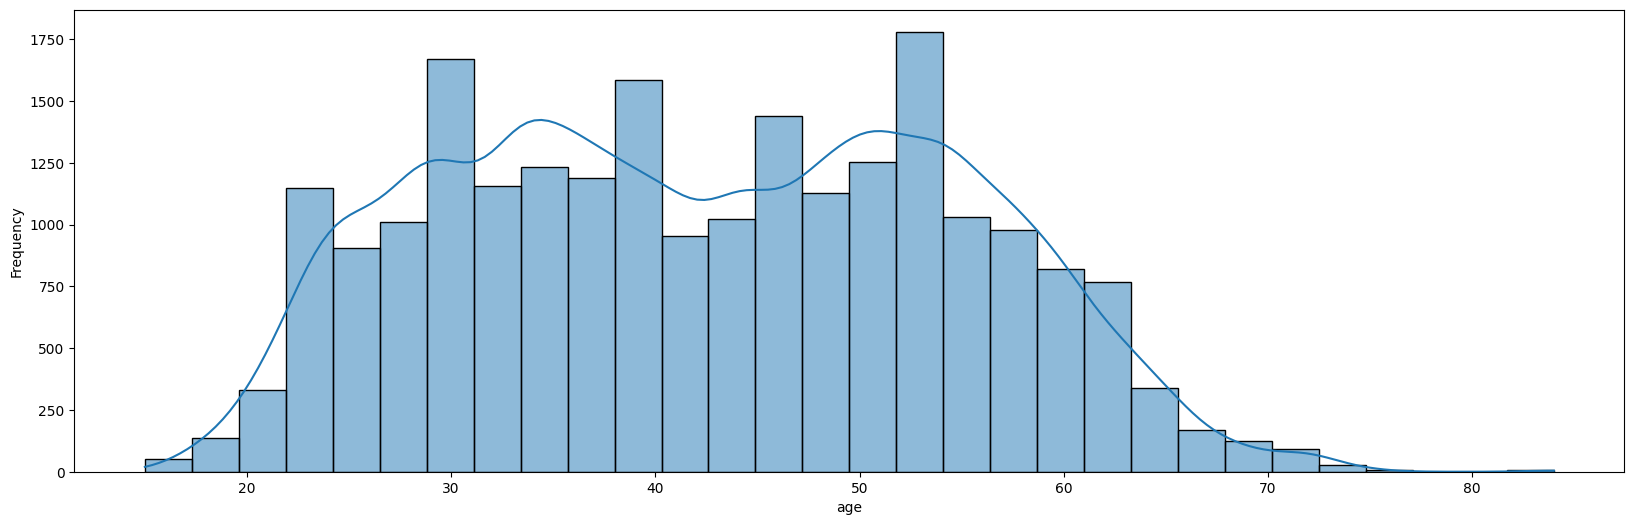

In [17]:
# checking age distribution
dist_age = df_od.age.value_counts()
plt.figure(figsize=(20, 6))
sns.histplot(df_od, x='age', kde=True, bins=30, stat='frequency');

We see a fairly regular bell curve with some spikes near 30, 40, and 50. 

In [19]:
# checking drug distribution
df_drug = df_od.groupby('drug').agg({'found': 'sum'}).reset_index()
df_drug['prop_tot'] = df_drug.found / df_drug.found.sum()

Next we'll look at the most prevalent drugs found in overdoses. This will give let us know any drugs of interest to study in our dataset.

Text(0, 0.5, 'drugs')

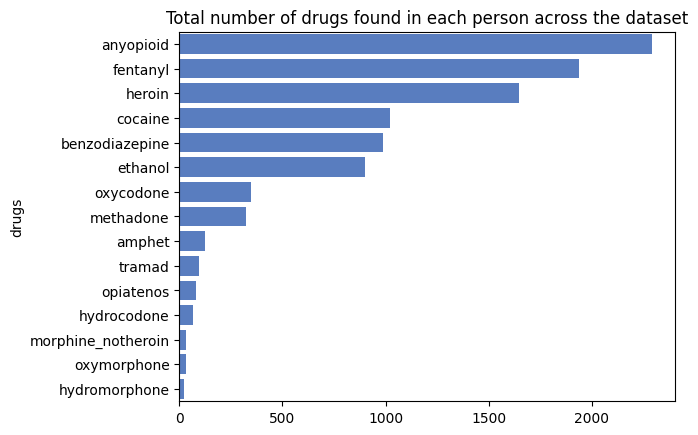

In [37]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
d_plot = df_drug.sort_values(by='found', ascending=False)
sns.barplot(data=d_plot, x='found', y='drug', color='b')

# Add title and labels for x and y axes
plt.title('Total number of drugs found in each person across the dataset')
plt.xlabel("")
plt.ylabel("drugs")

Opioids make up a majority of drugs involved in OD

We separated our dataframe by age into 6 groups, and each group is contained in its own dataframe. Below is the number of death per group.

In [21]:
df_od['age_group'] = df_od.age.apply(lambda x: 
                                        '65+' if x >=65 else
                                        '55-64' if x >=55 else
                                        '45-54' if x >=45 else
                                        '35-44' if x >=35 else
                                        '25-34' if x >=25 else
                                        '<24')
df_od.head()

,id,age,date,sex,drug,found,age_group
0,16-0165,30,2016-03-13,Female,heroin,1,25-34
1,15-0232,50,2015-05-14,Male,heroin,1,45-54
2,16-0028,29,2016-01-13,Male,heroin,1,25-34
3,16-0065,54,2016-01-30,Male,heroin,1,45-54
4,16-0889,32,2016-12-20,Male,heroin,1,25-34


In [22]:
# age groups
df_u24 = df_od[df_od['age_group'] == '<24']
df_25_34 = df_od[df_od['age_group'] == '25-34']
df_35_44 = df_od[df_od['age_group'] == '35-44']
df_45_54 = df_od[df_od['age_group'] == '45-54']
df_55_64 = df_od[df_od['age_group'] == '55-64']
df_65plus = df_od[df_od['age_group'] == '65+']

We sort our groups by the most common drugs found in fatal overdose. This will be helpful in juxtaposing each group against the entire dataset.

In [23]:
# group under 24
df_u24_gpby = df_u24.groupby('drug').agg({'found': 'sum'}).sort_values(by='found', ascending=False).reset_index()
df_u24_gpby['prop_grp'] = df_u24_gpby.found / df_u24_gpby.found.sum()
names = df_u24_gpby['drug'].values[:5].tolist()
df_drug[df_drug['drug'].isin(names)]
data_b = df_drug[df_drug['drug'].isin(names)][['drug', 'found','prop_tot']].sort_values(by=['found'], ascending=False)

,drug,found,prop_tot
1,anyopioid,2291,0.231297
5,fentanyl,1937,0.195558
6,heroin,1648,0.166381
3,cocaine,1022,0.103180
2,benzodiazepine,988,0.099748


For each age group we are going to plot the proportion of drugs used in overdose. We're also going to plot the proportion of overdoses in the age group compared to the total dataset. We hope to expose any trends found between groups. 

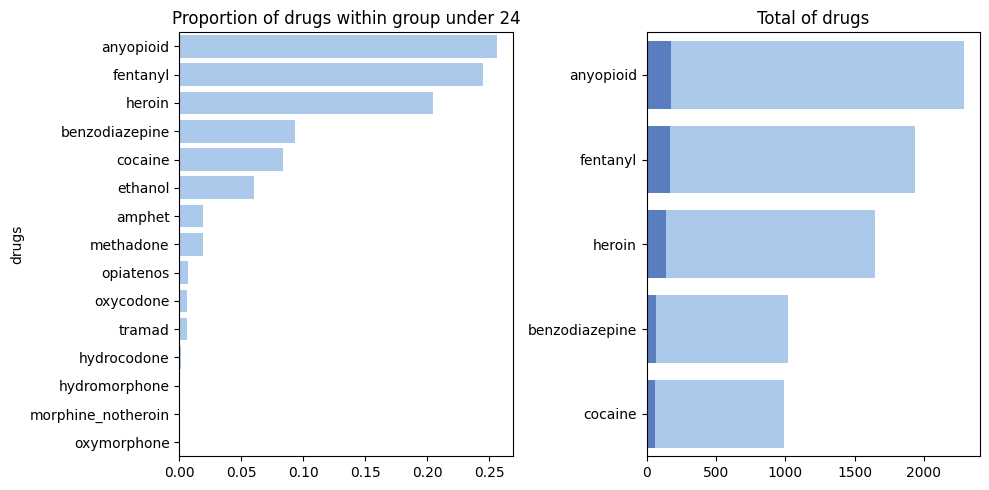

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(data=df_u24_gpby, x='prop_grp', y='drug', color='b', ax=axes[0])
sns.barplot(x='found', y="drug", data=data_b, color="b")

sns.set_color_codes("muted")
# plt.subplot(1, 2, 2)
sns.barplot(x='found', y="drug", data=df_u24_gpby[:5], color="b", ax=axes[1])

# Add title and labels for x and y axes
axes[0].set_title('Proportion of drugs within group under 24')
axes[0].set_xlabel("")
axes[0].set_ylabel("drugs")
axes[1].set_title("Total of drugs")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.subplots_adjust(wspace=0.5) 
plt.tight_layout()

The under 24 age group favors opioids, heroin, and fentanyl for overdose. They make up a very small small proportion but they follow the general trends of the full dataset. There is less cocaine and oxycodone use.

In [25]:
# group under 25-34
df_25_34_gpby = df_25_34.groupby('drug').agg({'found': 'sum'}).sort_values(by='found', ascending=False).reset_index()
df_25_34_gpby['prop_grp'] = df_25_34_gpby.found / df_25_34_gpby.found.sum()
names = df_25_34_gpby['drug'].values[:5].tolist()
df_drug[df_drug['drug'].isin(names)]
data_b = df_drug[df_drug['drug'].isin(names)][['drug', 'found','prop_tot']].sort_values(by=['found'], ascending=False)

,drug,found,prop_tot
1,anyopioid,2291,0.231297
5,fentanyl,1937,0.195558
6,heroin,1648,0.166381
3,cocaine,1022,0.103180
2,benzodiazepine,988,0.099748


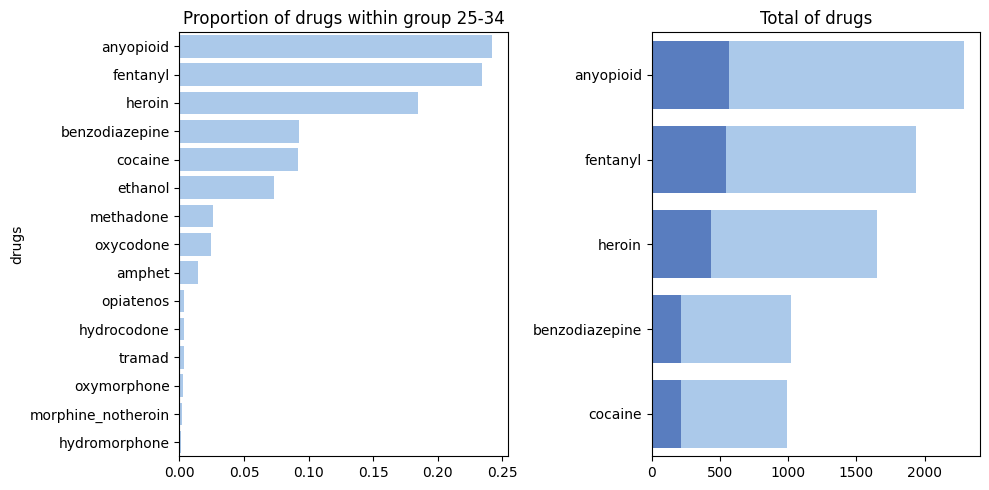

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(data=df_25_34_gpby, x='prop_grp', y='drug', color='b', ax=axes[0])
sns.barplot(x='found', y="drug", data=data_b, color="b")

sns.set_color_codes("muted")
# plt.subplot(1, 2, 2)
sns.barplot(x='found', y="drug", data=df_25_34_gpby[:5], color="b", ax=axes[1])

# Add title and labels for x and y axes
axes[0].set_title('Proportion of drugs within group 25-34')
axes[0].set_xlabel("")
axes[0].set_ylabel("drugs")
axes[1].set_title("Total of drugs")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.subplots_adjust(wspace=0.5) 
plt.tight_layout()

The 25-34 group matches the trend of the dataset almost exactly. There is slightly more benzodiazepine use than the full dataset and an increase in ethanol (alcohol) overdose. 

In [27]:
# group under 35-44
df_35_44_gpby = df_35_44.groupby('drug').agg({'found': 'sum'}).sort_values(by='found', ascending=False).reset_index()
df_35_44_gpby['prop_grp'] = df_35_44_gpby.found / df_35_44_gpby.found.sum()
names = df_35_44_gpby['drug'].values[:5].tolist()
df_drug[df_drug['drug'].isin(names)]
data_b = df_drug[df_drug['drug'].isin(names)][['drug', 'found','prop_tot']].sort_values(by=['found'], ascending=False)

,drug,found,prop_tot
1,anyopioid,2291,0.231297
5,fentanyl,1937,0.195558
6,heroin,1648,0.166381
3,cocaine,1022,0.103180
2,benzodiazepine,988,0.099748


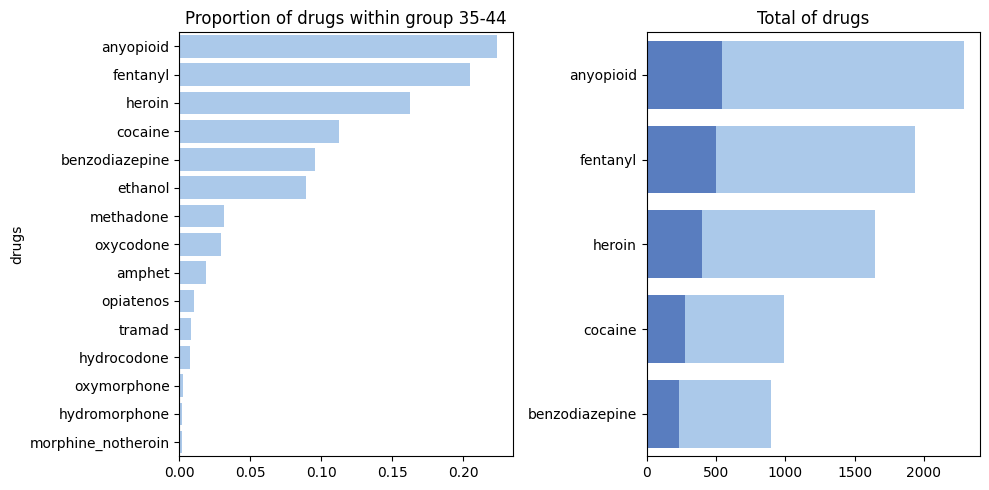

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(data=df_35_44_gpby, x='prop_grp', y='drug', color='b', ax=axes[0])
sns.barplot(x='found', y="drug", data=data_b, color="b")

sns.set_color_codes("muted")
# plt.subplot(1, 2, 2)
sns.barplot(x='found', y="drug", data=df_35_44_gpby[:5], color="b", ax=axes[1])

# Add title and labels for x and y axes
axes[0].set_title('Proportion of drugs within group 35-44')
axes[0].set_xlabel("")
axes[0].set_ylabel("drugs")
axes[1].set_title("Total of drugs")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.subplots_adjust(wspace=0.5) 
plt.tight_layout()

The 35-44 age group represents the first time that the top 5 drugs found matches the overall dataset. This is also one of the largest populations, so they affect the proportion of the total group more.

In [29]:
# group under 45-54
df_45_54_gpby = df_45_54.groupby('drug').agg({'found': 'sum'}).sort_values(by='found', ascending=False).reset_index()
df_45_54_gpby['prop_grp'] = df_45_54_gpby.found / df_45_54_gpby.found.sum()
names = df_45_54_gpby['drug'].values[:5].tolist()
df_drug[df_drug['drug'].isin(names)]
data_b = df_drug[df_drug['drug'].isin(names)][['drug', 'found','prop_tot']].sort_values(by=['found'], ascending=False)

,drug,found,prop_tot
1,anyopioid,2291,0.231297
5,fentanyl,1937,0.195558
6,heroin,1648,0.166381
3,cocaine,1022,0.103180
4,ethanol,900,0.090863


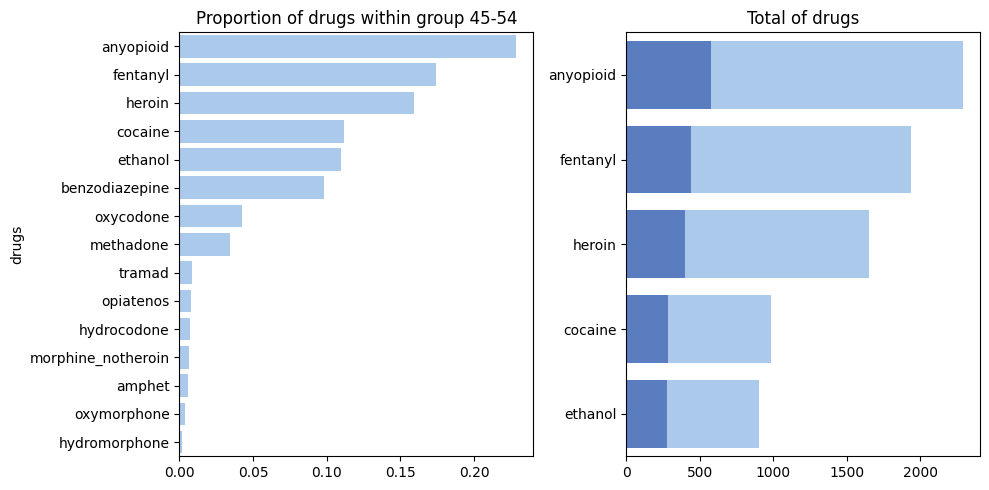

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(data=df_45_54_gpby, x='prop_grp', y='drug', color='b', ax=axes[0])
sns.barplot(x='found', y="drug", data=data_b, color="b")

sns.set_color_codes("muted")
# plt.subplot(1, 2, 2)
sns.barplot(x='found', y="drug", data=df_45_54_gpby[:5], color="b", ax=axes[1])

# Add title and labels for x and y axes
axes[0].set_title('Proportion of drugs within group 45-54')
axes[0].set_xlabel("")
axes[0].set_ylabel("drugs")
axes[1].set_title("Total of drugs")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.subplots_adjust(wspace=0.5) 
plt.tight_layout()

The 45-54 age group sees an increase in the proportion of heroin overdose. This is the first time that heroin significantly catches up to fentanyl in drugs found. Ethanol also replaces benzodiazepine as the 5th most common drug.

In [31]:
# group under 55-64
df_55_64_gpby = df_55_64.groupby('drug').agg({'found': 'sum'}).sort_values(by='found', ascending=False).reset_index()
df_55_64_gpby['prop_grp'] = df_55_64_gpby.found / df_55_64_gpby.found.sum()
names = df_55_64_gpby['drug'].values[:5].tolist()
df_drug[df_drug['drug'].isin(names)]
data_b = df_drug[df_drug['drug'].isin(names)][['drug', 'found','prop_tot']].sort_values(by=['found'], ascending=False)

,drug,found,prop_tot
1,anyopioid,2291,0.231297
5,fentanyl,1937,0.195558
6,heroin,1648,0.166381
3,cocaine,1022,0.103180
2,benzodiazepine,988,0.099748


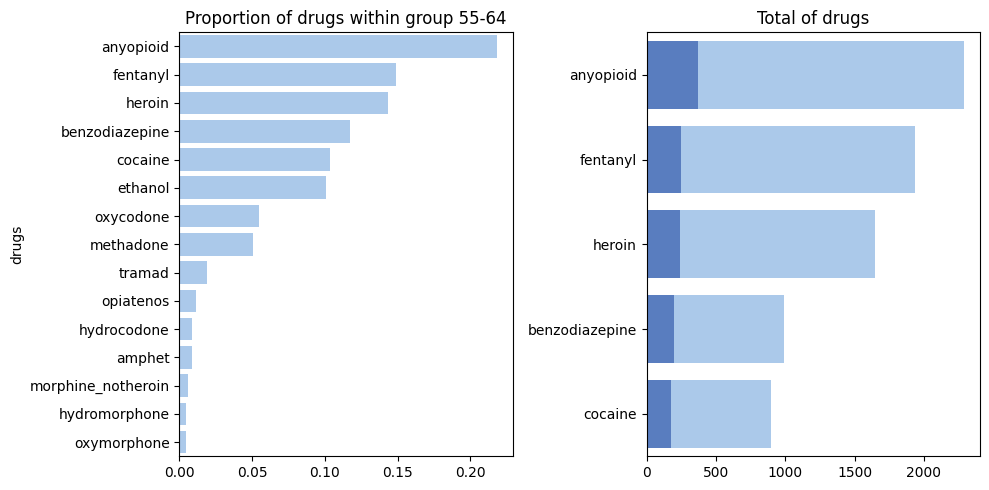

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(data=df_55_64_gpby, x='prop_grp', y='drug', color='b', ax=axes[0])
sns.barplot(x='found', y="drug", data=data_b, color="b")

sns.set_color_codes("muted")
# plt.subplot(1, 2, 2)
sns.barplot(x='found', y="drug", data=df_55_64_gpby[:5], color="b", ax=axes[1])

# Add title and labels for x and y axes
axes[0].set_title('Proportion of drugs within group 55-64')
axes[0].set_xlabel("")
axes[0].set_ylabel("drugs")
axes[1].set_title("Total of drugs")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.subplots_adjust(wspace=0.5) 
plt.tight_layout()

For the 55-64 age group, heroin and fentanyl overdoses are almost even. Any opioid takes up a significantly higher proportion than either of the drugs. Ethanol is no longer in the top 5 drugs found in overdose. Benzodiazepine is more prevalent than cocaine in the top 5. We also start see a decrease in total proportion compared to the database.

In [33]:
# group 65+
df_65plus_gpby = df_65plus.groupby('drug').agg({'found': 'sum'}).sort_values(by='found', ascending=False).reset_index()
df_65plus_gpby['prop_grp'] = df_65plus_gpby.found / df_65plus_gpby.found.sum()
names = df_65plus_gpby['drug'].values[:5].tolist()
df_drug[df_drug['drug'].isin(names)]
data_b = df_drug[df_drug['drug'].isin(names)][['drug', 'found','prop_tot']].sort_values(by=['found'], ascending=False)

,drug,found,prop_tot
1,anyopioid,2291,0.231297
5,fentanyl,1937,0.195558
6,heroin,1648,0.166381
2,benzodiazepine,988,0.099748
4,ethanol,900,0.090863


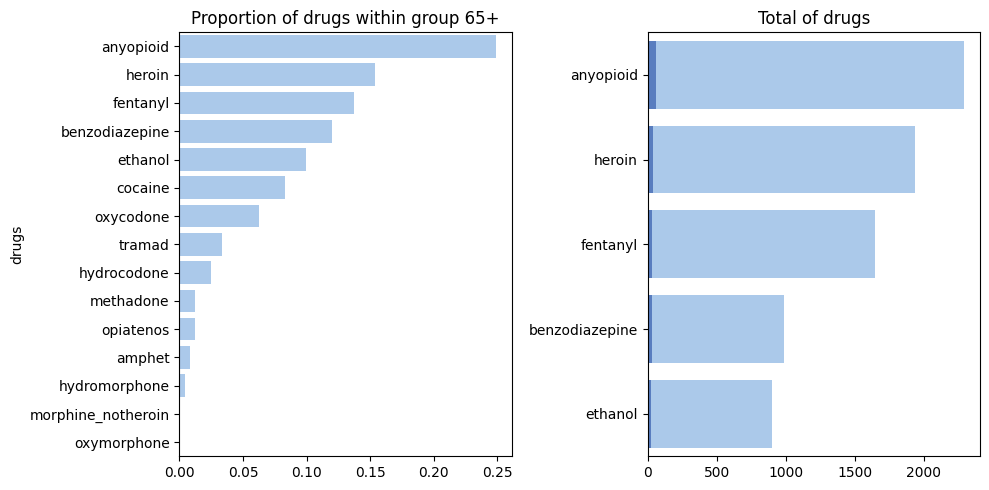

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(data=df_65plus_gpby, x='prop_grp', y='drug', color='b', ax=axes[0])
sns.barplot(x='found', y="drug", data=data_b, color="b")

sns.set_color_codes("muted")
# plt.subplot(1, 2, 2)
sns.barplot(x='found', y="drug", data=df_65plus_gpby[:5], color="b", ax=axes[1])

# Add title and labels for x and y axes
axes[0].set_title('Proportion of drugs within group 65+')
axes[0].set_xlabel("")
axes[0].set_ylabel("drugs")
axes[1].set_title("Total of drugs")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.subplots_adjust(wspace=0.5) 
plt.tight_layout()

Our final age group (65+) is the smallest group in our dataset. This is the only group with more heroin present in overdoses than fentanyl. Benzodiazepine and ethanol both overtake cocaine as more commonly found drugs. This group has the highest proportion of tramadol compared to other age groups.

# Data Analysis, Model, Validation & Results

We created a box plot to better understand the proportional spread of drugs found between age groups. The box plot confirms the assumptions we made from our histogram earlier. The groups that have significant differences from the total dataset make up the smallest proportion.

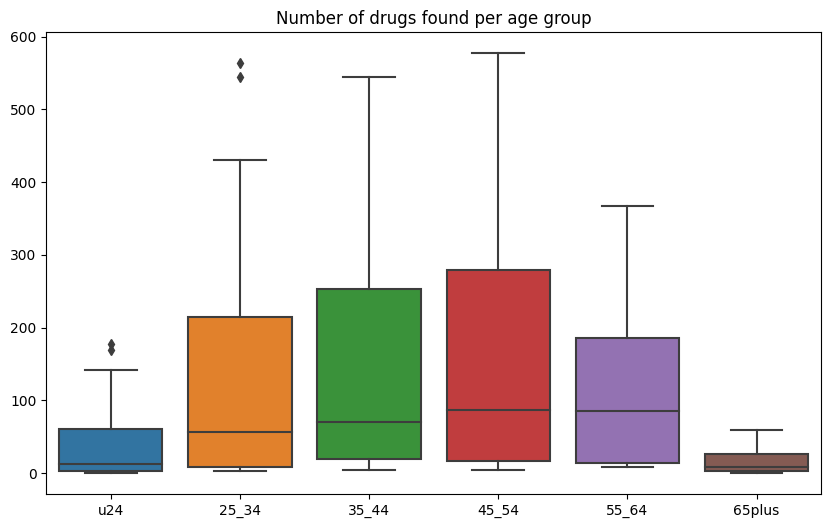

In [35]:
plt.figure(figsize=(10, 6))
a = df_u24_gpby
a['age_group'] = 'u24'
b = df_25_34_gpby
b['age_group'] = '25_34'
c = df_35_44_gpby
c['age_group'] = '35_44'
d = df_45_54_gpby
d['age_group'] = '45_54'
e = df_55_64_gpby
e['age_group'] = '55_64'
f = df_65plus_gpby
f['age_group'] = '65plus'
x_data = pd.concat([a, b, c, d, e, f], axis=0)
x_data

sns.boxplot(x='age_group', y='found', data=x_data)
plt.title('Number of drugs found per age group')
plt.ylabel('')
plt.xlabel('');

Now we want to compare the differences in drugs found in overdose by year of fatal overdose. We want to see if the trend of most commonly used drugs changed over time from 2015-2018. We ordered this by count instead of proportion to see if the amount of deaths changed over time as well.

In [42]:
#print(df_od['drug'].unique())
heroin_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'heroin')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'heroin')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'heroin')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'heroin')]['found'])}
cocaine_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'cocaine')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'cocaine')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'cocaine')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'cocaine')]['found'])}
fent_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'fentanyl')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'fentanyl')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'fentanyl')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'fentanyl')]['found'])}
oxyc_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'oxycodone')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'oxycodone')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'oxycodone')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'oxycodone')]['found'])}
oxym_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'oxymorphone')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'oxymorphone')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'oxymorphone')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'oxymorphone')]['found'])}
eth_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'ethanol')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'ethanol')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'ethanol')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'ethanol')]['found'])}
hydroc_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'hydrocodone')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'hydrocodone')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'hydrocodone')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'hydrocodone')]['found'])}
benzo_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'benzodiazepine')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'benzodiazepine')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'benzodiazepine')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'benzodiazepine')]['found'])}
metha_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'methadone')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'methadone')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'methadone')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'methadone')]['found'])}
amphet_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'amphet')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'amphet')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'amphet')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'amphet')]['found'])}
tramad_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'tramad')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'tramad')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'tramad')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'tramad')]['found'])}
morphnh_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'morphine_notheroin')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'morphine_notheroin')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'morphine_notheroin')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'morphine_notheroin')]['found'])}
hydrom_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'hydromorphone')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'hydromorphone')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'hydromorphone')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'hydromorphone')]['found'])}
opinos_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'opiatenos')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'opiatenos')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'opiatenos')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'opiatenos')]['found'])}
anyopioid_dict = {2015:sum(df_od[(df_od['date'].dt.year == 2015) & (df_od['drug'] == 'anyopioid')]['found']), 
               2016:sum(df_od[(df_od['date'].dt.year == 2016) & (df_od['drug'] == 'anyopioid')]['found']), 
               2017:sum(df_od[(df_od['date'].dt.year == 2017) & (df_od['drug'] == 'anyopioid')]['found']),
               2018:sum(df_od[(df_od['date'].dt.year == 2018) & (df_od['drug'] == 'anyopioid')]['found'])}
drug_dict = {'heroin':heroin_dict, 
             'cocaine':cocaine_dict, 
             'fentanyl':fent_dict, 
             'oxycodone':oxyc_dict, 
             'oxymorphone': oxym_dict, 
             'ethanol': eth_dict, 
             'hydrocodone': hydroc_dict, 
             'benzodiazepine': benzo_dict, 
             'methadone': metha_dict,
             'amphet': amphet_dict, 
             'tramad': tramad_dict,
             'morphine_notheroin': morphnh_dict, 
             'hydromorphone': hydrom_dict, 
             'opiatenos': opinos_dict, 
             'anyopioid':anyopioid_dict}

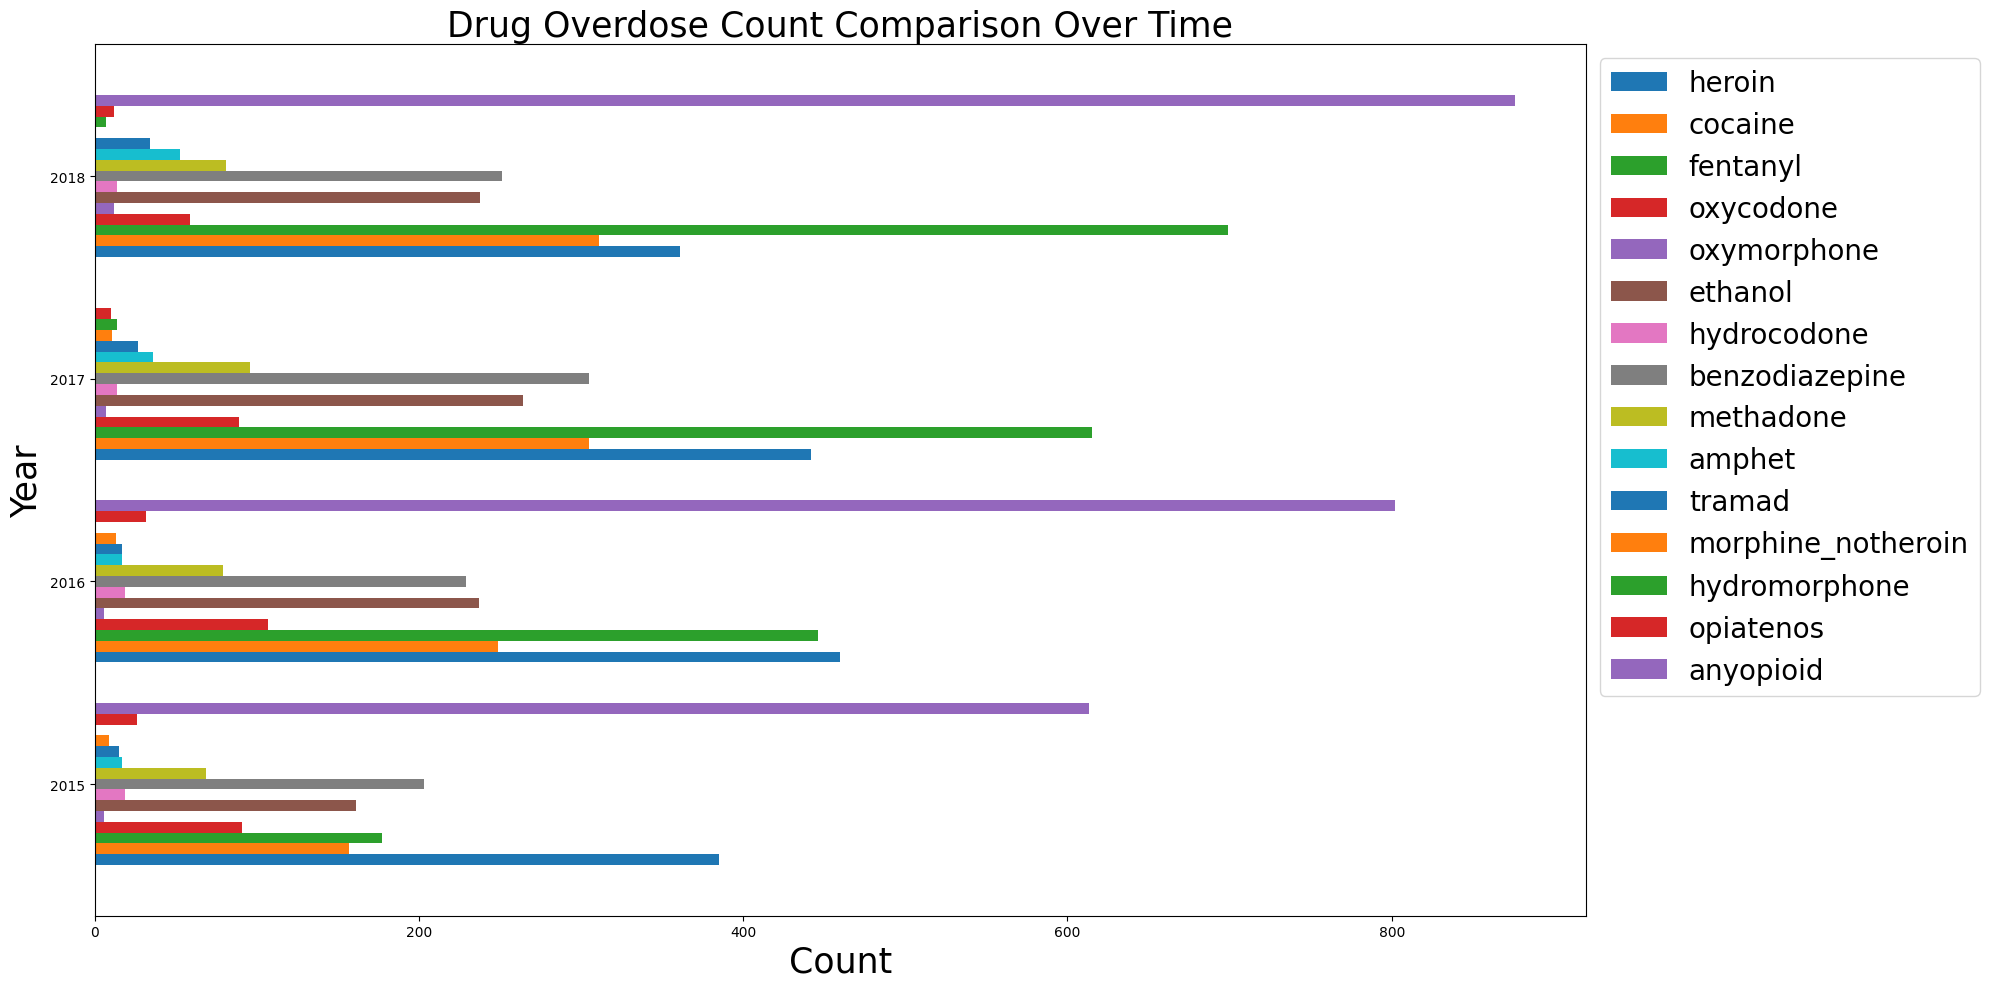

In [43]:
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df.plot.barh(width=.8)
plt.legend(bbox_to_anchor=(1.0,1.0), prop={'size': 20})
plt.xlabel('Count', fontdict={'size':25})
plt.ylabel('Year', fontdict={'size':25})
plt.title('Drug Overdose Count Comparison Over Time', fontdict={'size':25})
plt.show()

We found that the number of fatal overdoses increased steadily from year to year. In terms of drugs found, the proportions remain relatively similar, except for a clear increase in fentanyl overdose over time.

Now that we've seen how the amount of overdoses increased from 2015-2018, we want to see what drugs were most present in more detail. We are going to generate line graphs of the count each of the commonly found drugs in overdose to see how these change over time. 

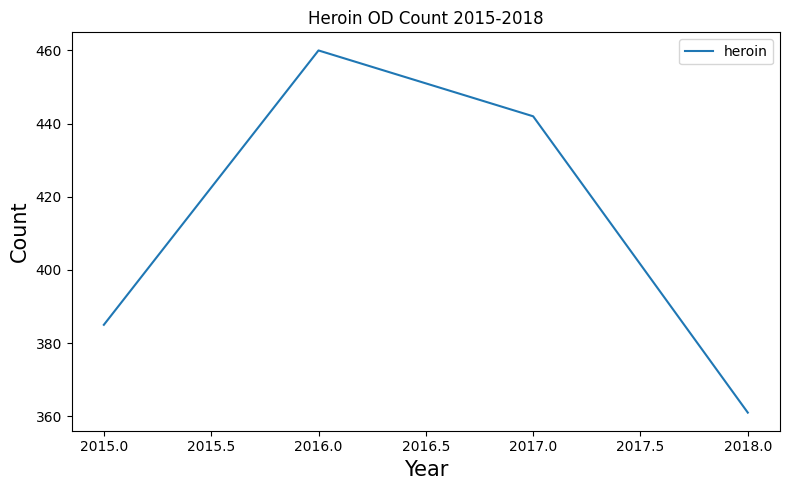

In [44]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df['heroin'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Heroin OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

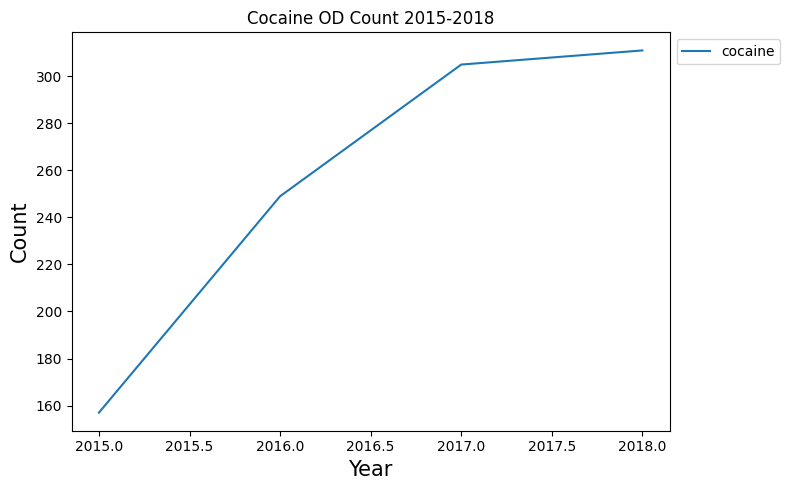

In [45]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df['cocaine'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Cocaine OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

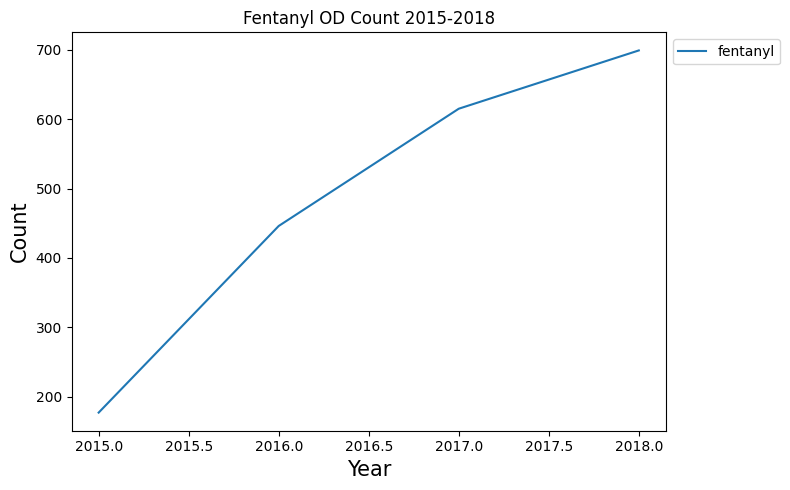

In [46]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['fentanyl'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Fentanyl OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

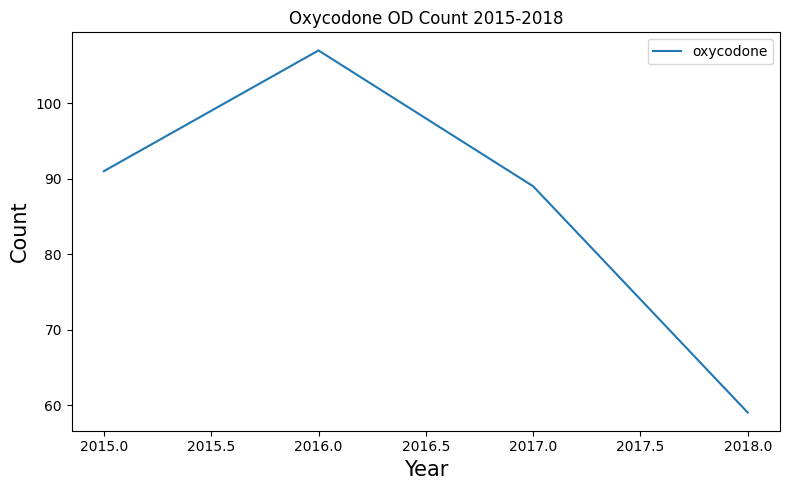

In [47]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['oxycodone'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Oxycodone OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

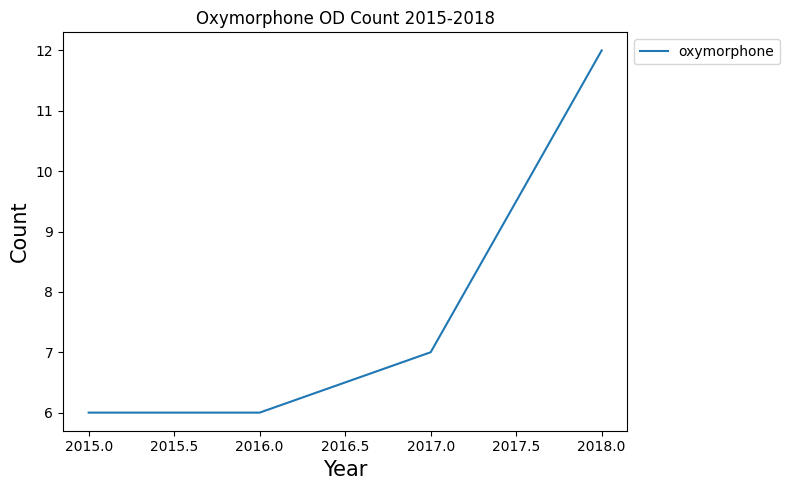

In [48]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['oxymorphone'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Oxymorphone OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

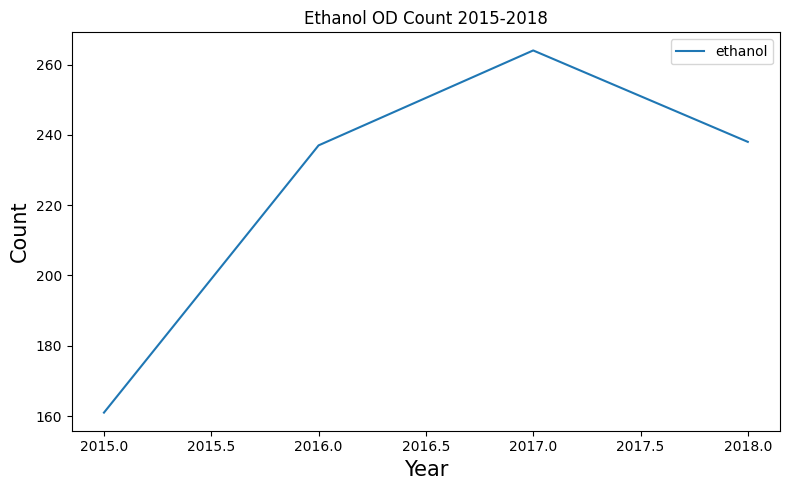

In [49]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['ethanol'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Ethanol OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

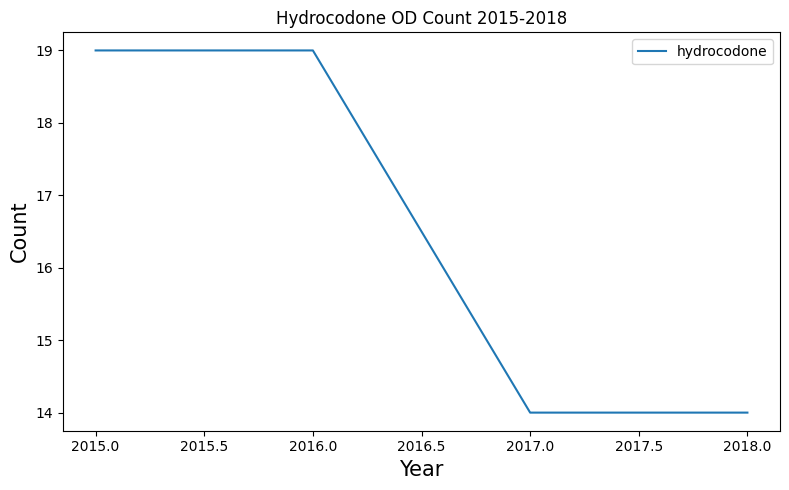

In [50]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['hydrocodone'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Hydrocodone OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

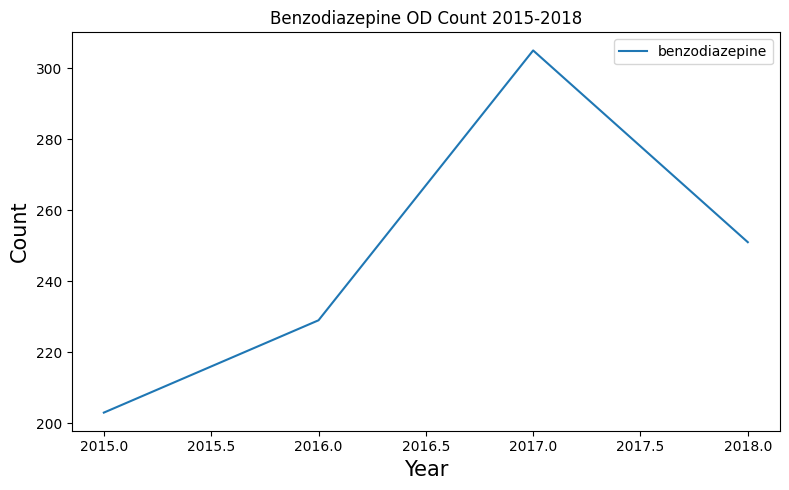

In [51]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['benzodiazepine'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Benzodiazepine OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

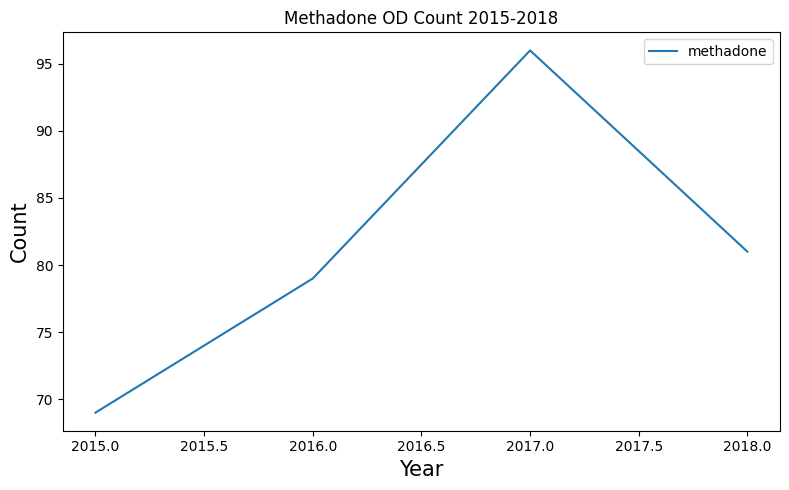

In [52]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['methadone'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Methadone OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

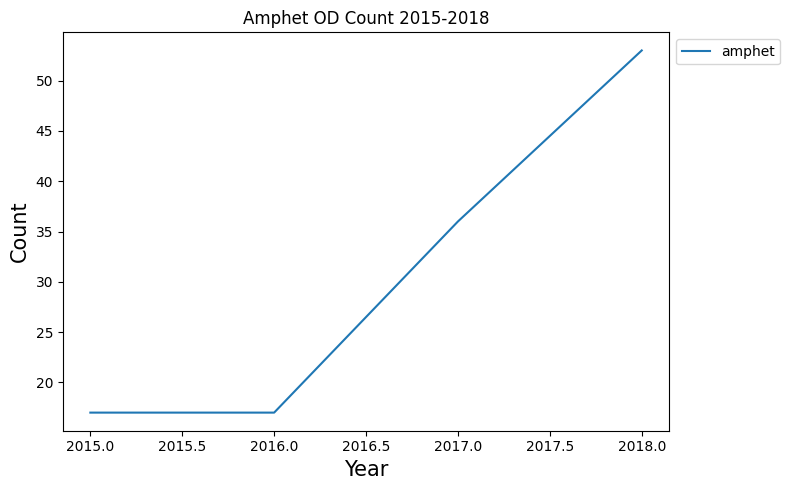

In [53]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['amphet'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Amphet OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

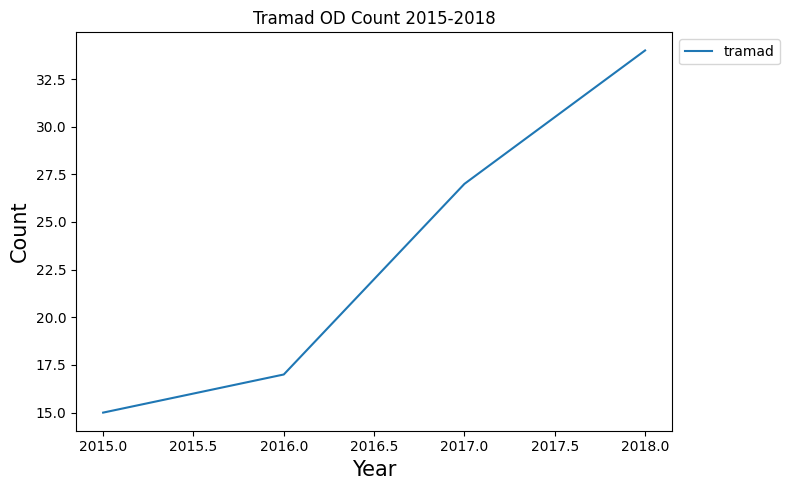

In [54]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['tramad'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Tramad OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

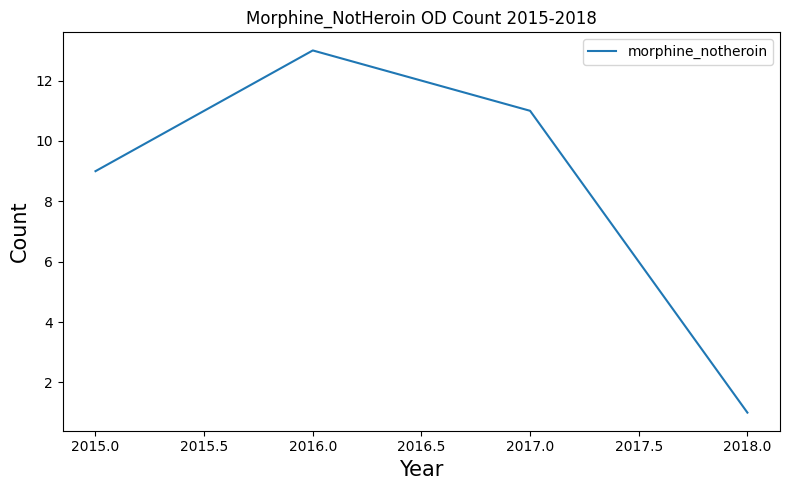

In [55]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['morphine_notheroin'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Morphine_NotHeroin OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

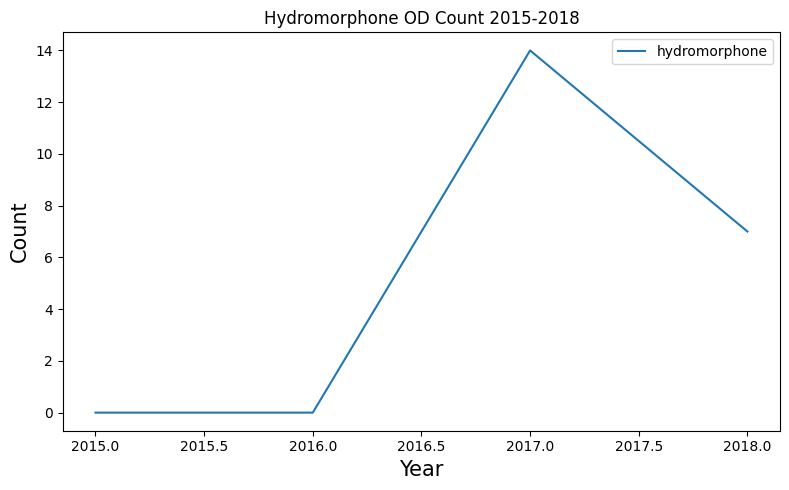

In [56]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['hydromorphone'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Hydromorphone OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

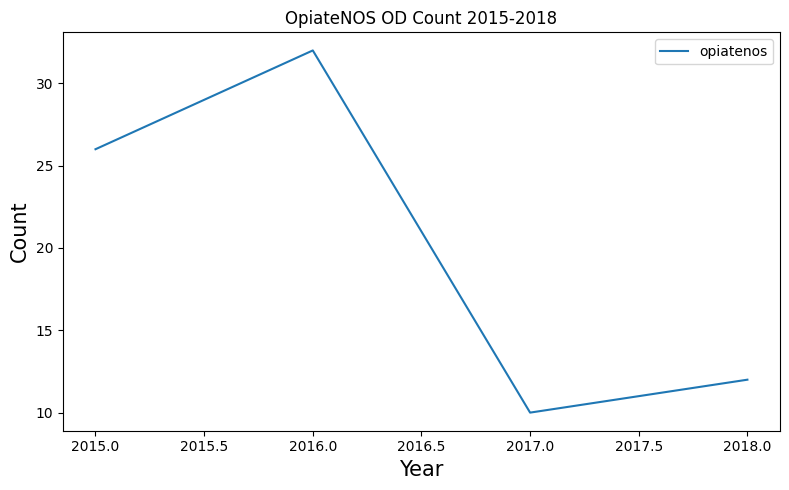

In [57]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['opiatenos'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('OpiateNOS OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

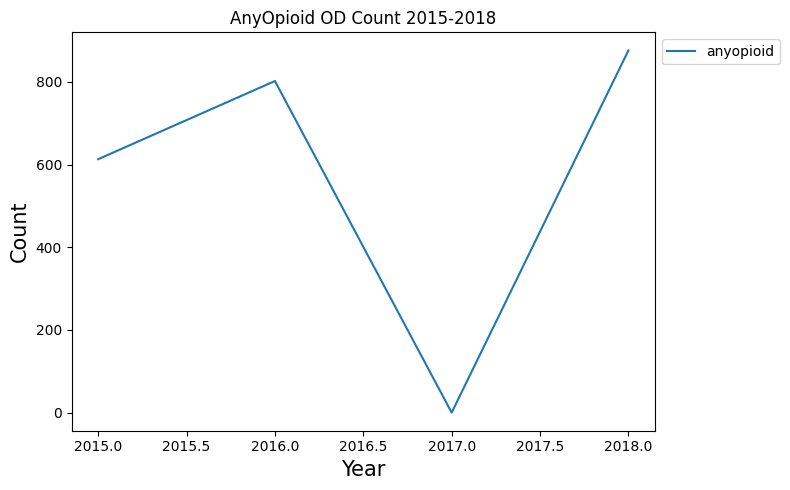

In [58]:
plt.rcParams["figure.figsize"] = [8,5]
plt.rcParams["figure.autolayout"] = True
drug_df = pd.DataFrame(drug_dict)
drug_df['anyopioid'].plot()
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('AnyOpioid OD Count 2015-2018')
plt.ylabel('Count', fontdict={'size':15})
plt.xlabel('Year', fontdict={'size':15})
plt.show()

After generating the plots, we see three trends between the drugs found in overdose. There are drugs that have seen a clear increase in overdose: cocaine, fentanyl, any opioid, oxymorphone, amphet, and tramadol. Some drugs see less overdose over time: heroin, oxycodone, and. hydrocodone. There are some drugs that were seeing a rise in count but began dropping off: ethanol, methadone, morphine, hydromorphone, and benzodiazepine.

Opioids make up a clear majority of drugs found in overdose in Connecticut from 2015-2018. Heroin, fentanyl, and any opioid (street drugs without a pharmaceutical name) are the top 3 drugs found in overdose in every age range. While there is a steady increase in cocaine overdose over time, the dramatic rise in fentanyl and any opioid overdose take an outsized proportion of our dataset. Because the same drugs are most prevalent in overdose across all age ranges, we have failed to reject our null hypothesis. There are differences in drug preference between age groups, especially when comparing under 24 and 65+, but these groups represent a small portion of our data. Even in those groups opioids take the top spots for drugs found in overdose. 

# Conclusion & Discussion

From our data we see an increase in fatal overdoses over time coinciding with a spike in opioid use, specifically fentanyl. . Being able to graph the data gave us context to the rise of fentanyl. The visualizations give insight to the severity of the opioid crisis. Using proportional bar plots allowed us to compare subsets of our dataset to the whole data. Having our line graphs for individual drugs over time next to the plot of totals for each year helped us to understand how drug trends changed over the recorded time frame. 

In another study we might use scatter plots in order to identify and explain outliers present in our dataset. In the future we could use linear regression in order to make predictions based on the data we have. If we had the time to predict the 2019-2022 trends and compare it to the real world data we could extrapolate that to make models for the future of drug overdose. Our dataset included race data, sex data, and quantity of drugs found. Future research could compare the drugs of choice between race and gender demographics. We also discussed comparing how race and gender affect the amount of drugs found in someone's system at time of death. 

It would be interesting to have more demographic factors present in our data. We saw that overall opioids make up the majority of overdose, but data such as income level or a more varied set of geographic locations could provide insight over what specific opioid is used in different situations. For example, the 65+ demographic in our study saw a higher proportion of prescription overdose than any other group, and less alcohol was present in individuals under 24. Now that we've failed to reject our null hypothesis we can look towards the mechanics of opioid abuse to identify interesting data.